<a href="https://colab.research.google.com/github/Godvampire07/NLP_LAB/blob/main/NLP_Lab3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [21]:
from collections import defaultdict #A dict that gives a default value if a key doesn’t exist (avoids KeyErrors).
import matplotlib.pyplot as plt


In [22]:
class TrieNode:
    def __init__(self):
        self.children = {} #dict to store the child nodes (next letters)
        self.freq = 0      # no of words which pass through this node
        self.is_end = False # mark the node if it is a end of a word

class Trie:
    def __init__(self):
        self.root = TrieNode()

    def insert(self, word):
        node = self.root
        for ch in word:
            if ch not in node.children:
                node.children[ch] = TrieNode()
            node = node.children[ch]             #
            node.freq += 1                       # increment frequency (path count)
        node.is_end = True                       # mark word completion


In [23]:
prefix_trie = Trie()
suffix_trie = Trie()

with open("/content/sample_data/brown_nouns.txt", "r") as f:
    words = [w.strip().lower() for w in f if w.strip()]

for w in words:
    prefix_trie.insert(w)
    suffix_trie.insert(w[::-1])  #go reverse , check suffix



In [24]:
freq = defaultdict(int)                #key = word, value = count
for w in words:
    freq[w] += 1
print(freq.items())

dict_items([('investigation', 43), ('primary', 15), ('election', 74), ('evidence', 203), ('irregularities', 8), ('place', 474), ('jury', 63), ('presentments', 1), ('charge', 104), ('praise', 13), ('thanks', 36), ('manner', 124), ('term', 75), ('reports', 69), ('handful', 13), ('interest', 323), ('number', 462), ('voters', 19), ('size', 133), ('city', 262), ('registration', 23), ('laws', 88), ('legislators', 19), ('end', 359), ('topics', 10), ('departments', 25), ('practices', 46), ('governments', 53), ('offices', 39), ('efficiency', 48), ('cost', 177), ('administration', 103), ('personnel', 70), ('result', 197), ('policies', 61), ('steps', 114), ('problem', 309), ('implementation', 8), ('automobile', 41), ('title', 51), ('law', 279), ('funds', 91), ('date', 97), ('swipe', 2), ('handling', 23), ('child', 209), ('welfare', 46), ('services', 126), ('homes', 62), ('items', 71), ('assistance', 83), ('program', 367), ('counties', 31), ('state', 528), ('exception', 40), ('money', 264), ('juro

In [25]:
sorted_freq = sorted(freq.items(), key=lambda x: x[1], reverse=True)
# sorted sorts any iterable
# key is to sort the data wrt x[1] which is freq
print(sorted_freq)

[('time', 1568), ('man', 1160), ('years', 946), ('way', 882), ('people', 828), ('men', 752), ('world', 686), ('life', 678), ('year', 641), ('day', 627), ('work', 578), ('state', 528), ('place', 474), ('part', 471), ('course', 464), ('number', 462), ('fact', 446), ('water', 426), ('school', 413), ('hand', 413), ('head', 404), ('night', 400), ('eyes', 394), ('system', 392), ('house', 388), ('group', 378), ('days', 377), ('program', 367), ('room', 364), ('side', 363), ('things', 362), ('end', 359), ('business', 359), ('use', 352), ('case', 349), ('point', 349), ('children', 346), ('order', 342), ('thing', 326), ('interest', 323), ('power', 322), ('others', 320), ('face', 319), ('members', 318), ('area', 318), ('family', 314), ('door', 312), ('country', 311), ('problem', 309), ('development', 306), ('war', 301), ('sense', 300), ('form', 300), ('kind', 295), ('action', 289), ('mind', 287), ('example', 286), ('hands', 285), ('feet', 283), ('matter', 281), ('line', 281), ('law', 279), ('histo

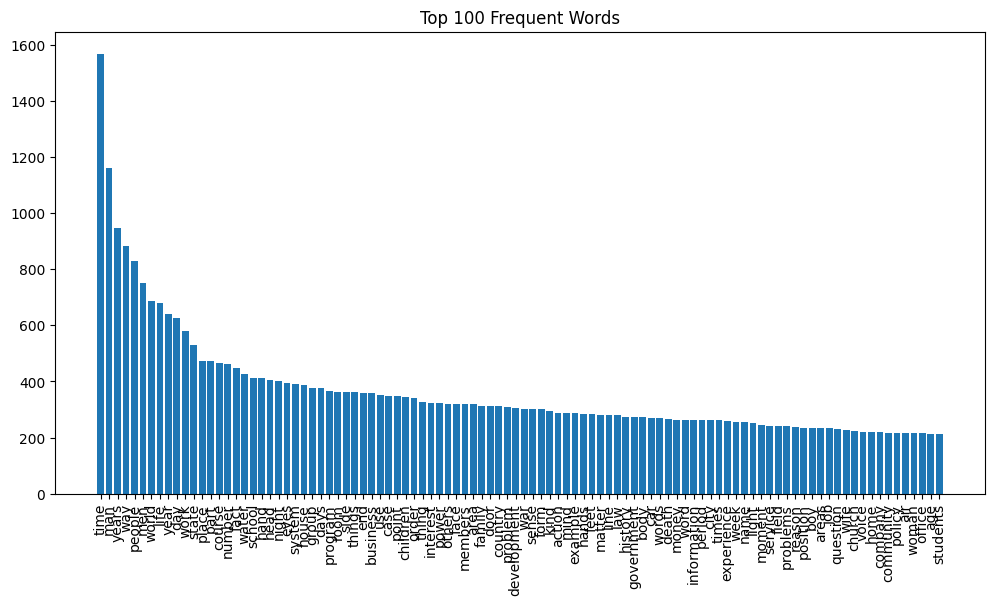

In [26]:
top_words, counts = zip(*sorted_freq[:100])
plt.figure(figsize=(12,6))
plt.bar(top_words, counts)
plt.xticks(rotation=90)
plt.title("Top 100 Frequent Words")
plt.show()


In [32]:
class TrieNode:
    def __init__(self):
        self.children = dict()
        self.count = 0  # Number of words passing through this node

class Trie:
    def __init__(self):
        self.root = TrieNode()

    def insert(self, word):
        node = self.root
        node.count += 1
        for char in word:
            if char not in node.children:
                node.children[char] = TrieNode()
            node = node.children[char]
            node.count += 1

    def find_branch_point(self, word):
        node = self.root
        prefix = ""
        max_branches = -1
        branch_point = 0
        total_nodes = 0
        for idx, char in enumerate(word):
            node = node.children[char]
            branches = len(node.children)
            # Record the branching node with highest number of branches
            if branches > max_branches:
                max_branches = branches
                branch_point = idx + 1
            total_nodes += 1
        return branch_point, max_branches / max(1, total_nodes)  # Index after stem, branch freq

# Helper to process both trie types
def process_trie(words, reverse=False):
    trie = Trie()
    # Insert words
    for w in words:
        to_insert = w[::-1] if reverse else w
        trie.insert(to_insert)
    # Find split for each word
    splits = []
    for w in words:
        to_check = w[::-1] if reverse else w
        split_idx, branch_freq = trie.find_branch_point(to_check)
        if reverse:
            stem = w[::-1][split_idx:][::-1]
            suffix = w[::-1][:split_idx][::-1]
        else:
            stem = w[:split_idx]
            suffix = w[split_idx:]
        splits.append((w, stem, suffix, branch_freq))
    return splits

# Example word list
with open("/content/sample_data/brown_nouns.txt", "r") as f:
    words = [w.strip().lower() for w in f if w.strip()]


# Prefix trie processing
prefix_results = process_trie(words, reverse=False)
# Suffix trie processing
suffix_results = process_trie(words, reverse=True)

print("Prefix Trie Splits:")
for w, stem, suffix, prob in prefix_results:
    print(f"{w} = {stem} + {suffix}  ") #(branch-prob={prob:.2f})

print("\nSuffix Trie Splits:")
for w, stem, suffix, prob in suffix_results:
    print(f"{w} = {stem} + {suffix} ")


Streaming output truncated to the last 5000 lines.
street = stree + t 
clothes = clothe + s 
release = releas + e 
head = hea + d 
moments = moment + s 
clothes = clothe + s 
bench = benc + h 
shoe = sho + e 
plenty = plent + y 
guys = guy + s 
leagues = league + s 
guys = guy + s 
club = clu + b 
hell = hel + l 
right = righ + t 
thing = th + ing 
thing = th + ing 
job = jo + b 
job = jo + b 
outfielders = outfielder + s 
way = wa + y 
interest = interes + t 
product = produc + t 
insularity = insularit + y 
reading = read + ing 
religion = religi + on 
subject = subjec + t 
religion = religi + on 
tomes = tome + s 
papers = paper + s 
birthday = birthda + y 
store = stor + e 
mother = moth + er 
image = imag + e 
god = go + d 
day = da + y 
mother = moth + er 
present = presen + t 
gift = gif + t 
room = roo + m 
dinner = dinn + er 
night = nigh + t 
god = go + d 
father = fath + er 
laughter = laught + er 
mother = moth + er 
father = fath + er 
parents = parent + s 
religion = reli

In [27]:
import re
from itertools import islice
def sentence_tokenizer(text):
    return re.split(r'(?<=[।!?|])\s+', text.strip())
#  ?<=  Lookbehind means: “Match something only if it is immediately preceded by a certain pattern.”
# strip - remove all the space in start , end of sentence
# r' ' - raw string
# Word tokenizer
def word_tokenizer(sentence):
    pattern = r'''(?x)                       #(?x) - tells python re to ignore space , comment in this string
        (https?://[^\s]+)                    # URLs  #:// takes the literal character //
      | (\w+@\w+\.\w+)                       # Emails
      | (\d{1,2}[-/]\d{1,2}[-/]\d{2,4})      # Dates
      | (\d+\.\d+)                           # Decimals
      | (\d+)                                # Whole numbers
      | ([\u0900-\u097F]+)                   # Devanagari (Marathi/Hindi) words
      | ([a-zA-Z]+)                          # English words
      | ([।.,!?;:"'\-—()])                   # Punctuation
    '''
    tokens = re.findall(pattern, sentence)
    #When used with re.findall, each token will go into a separate group.
    # Flatten the list of tuples into a single list
    return [t for group in tokens for t in group if t]



In [28]:
from datasets import load_dataset
dataset = load_dataset("ai4bharat/IndicCorpV2",split = "mar_Deva" , streaming = True)
display(dataset)

/usr/local/lib/python3.12/dist-packages/huggingface_hub/utils/_auth.py:94: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


README.md: 0.00B [00:00, ?B/s]

IterableDataset({
    features: Unknown,
    num_shards: 1
})

In [29]:
max_examples = 100000
tokenized_dataset = []  # a list to hold all tokens from all examples
# Safely iterate over streaming dataset with limit
for example in islice(dataset, max_examples): # word, freq
    text = example["text"]
    sentences = sentence_tokenizer(text)
    for sentence in sentences:
        tokens = word_tokenizer(sentence)
        if tokens:
            tokenized_dataset.extend(tokens)

/tmp/ipython-input-3602092210.py:22: UserWarning: Glyph 2310 (\N{DEVANAGARI LETTER AA}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/tmp/ipython-input-3602092210.py:22: UserWarning: Matplotlib currently does not support Devanagari natively.
  plt.tight_layout()
/tmp/ipython-input-3602092210.py:22: UserWarning: Glyph 2361 (\N{DEVANAGARI LETTER HA}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/tmp/ipython-input-3602092210.py:22: UserWarning: Glyph 2375 (\N{DEVANAGARI VOWEL SIGN E}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/tmp/ipython-input-3602092210.py:22: UserWarning: Glyph 2339 (\N{DEVANAGARI LETTER NNA}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/tmp/ipython-input-3602092210.py:22: UserWarning: Glyph 2367 (\N{DEVANAGARI VOWEL SIGN I}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/tmp/ipython-input-3602092210.py:22: UserWarning: Glyph 2351 (\N{DEVANAGARI LETTER YA}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/tmp/

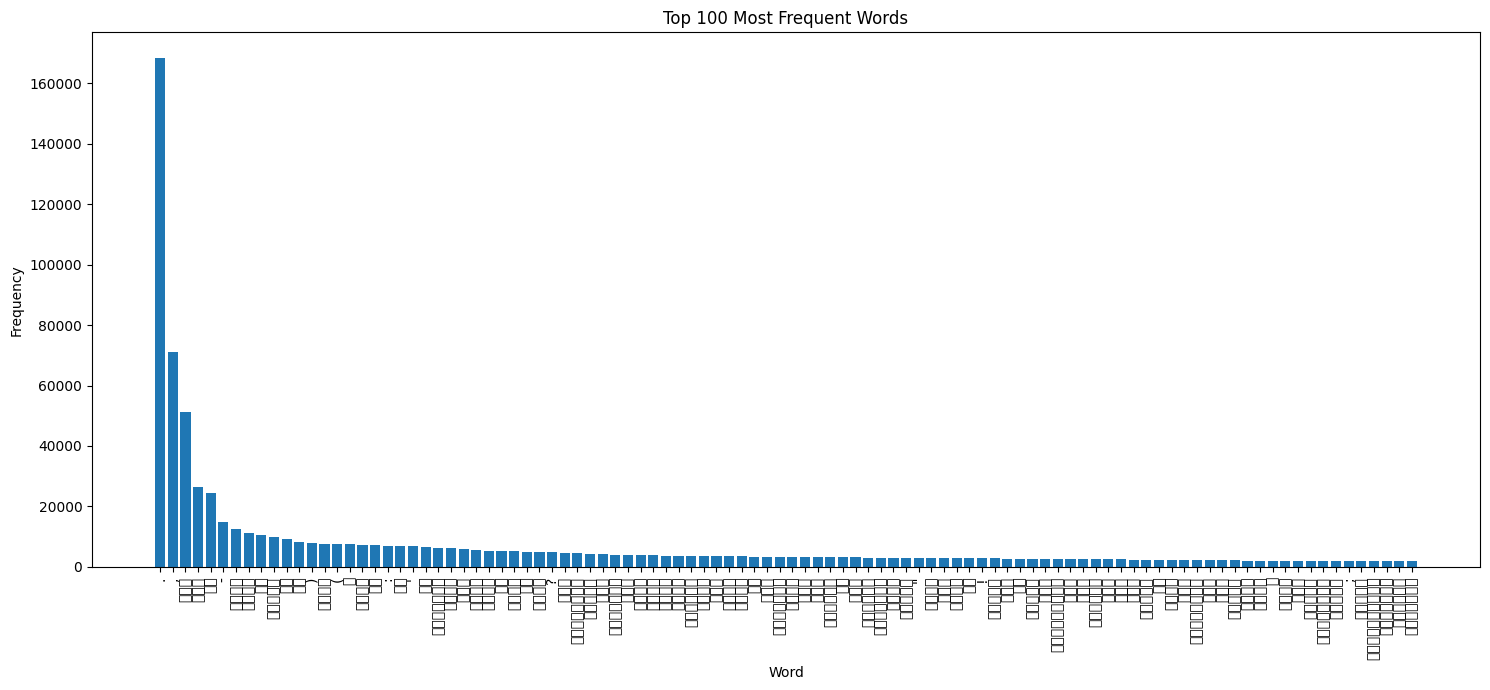

/tmp/ipython-input-3602092210.py:41: UserWarning: Glyph 2354 (\N{DEVANAGARI LETTER LA}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/tmp/ipython-input-3602092210.py:41: UserWarning: Matplotlib currently does not support Devanagari natively.
  plt.tight_layout()
/tmp/ipython-input-3602092210.py:41: UserWarning: Glyph 2379 (\N{DEVANAGARI VOWEL SIGN O}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/tmp/ipython-input-3602092210.py:41: UserWarning: Glyph 2325 (\N{DEVANAGARI LETTER KA}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/tmp/ipython-input-3602092210.py:41: UserWarning: Glyph 2306 (\N{DEVANAGARI SIGN ANUSVARA}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/tmp/ipython-input-3602092210.py:41: UserWarning: Glyph 2313 (\N{DEVANAGARI LETTER U}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/tmp/ipython-input-3602092210.py:41: UserWarning: Glyph 2342 (\N{DEVANAGARI LETTER DA}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/tmp/i

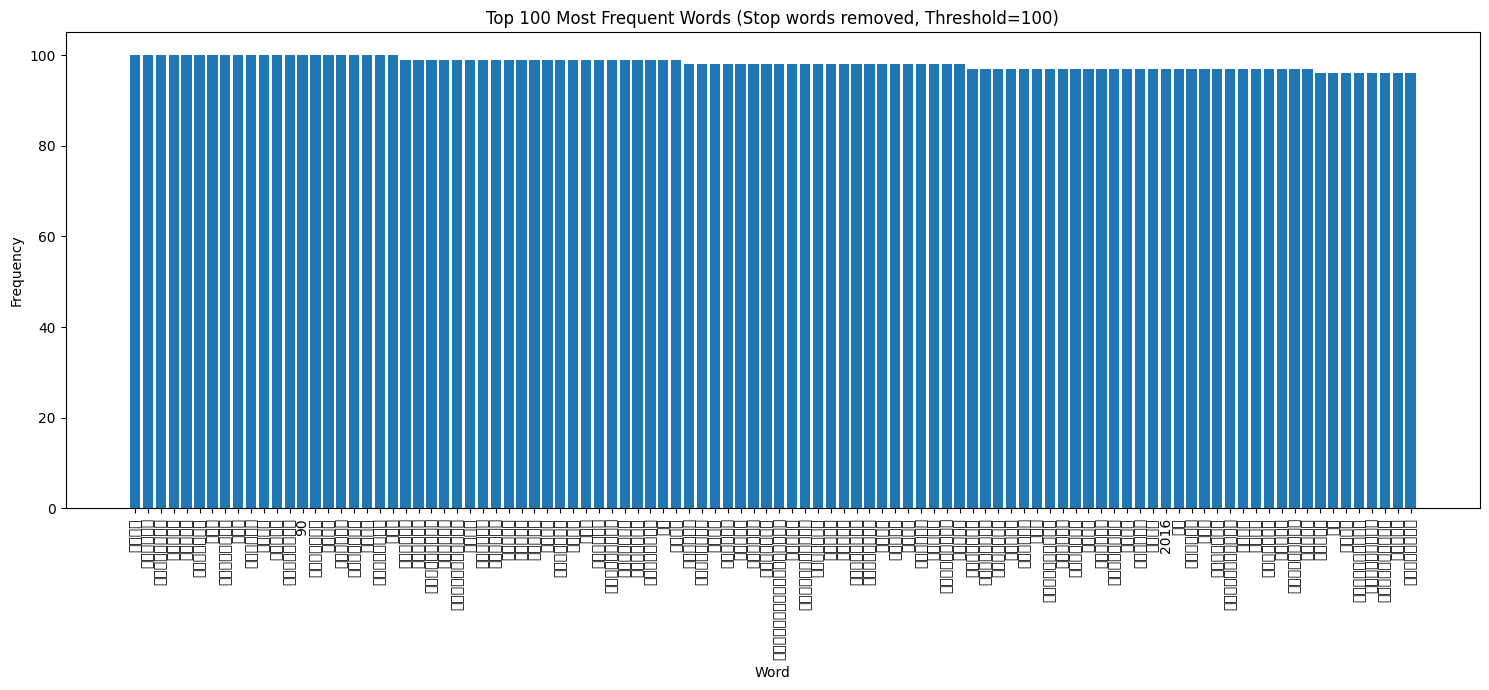

/tmp/ipython-input-3602092210.py:41: UserWarning: Glyph 2349 (\N{DEVANAGARI LETTER BHA}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/tmp/ipython-input-3602092210.py:41: UserWarning: Glyph 2408 (\N{DEVANAGARI DIGIT TWO}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/tmp/ipython-input-3602092210.py:41: UserWarning: Glyph 2305 (\N{DEVANAGARI SIGN CANDRABINDU}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/tmp/ipython-input-3602092210.py:41: UserWarning: Glyph 2409 (\N{DEVANAGARI DIGIT THREE}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/tmp/ipython-input-3602092210.py:41: UserWarning: Glyph 2407 (\N{DEVANAGARI DIGIT ONE}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/tmp/ipython-input-3602092210.py:41: UserWarning: Glyph 2406 (\N{DEVANAGARI DIGIT ZERO}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/usr/local/lib/python3.12/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 2349 (\N{DEVANAGARI LETTER BHA}) missing

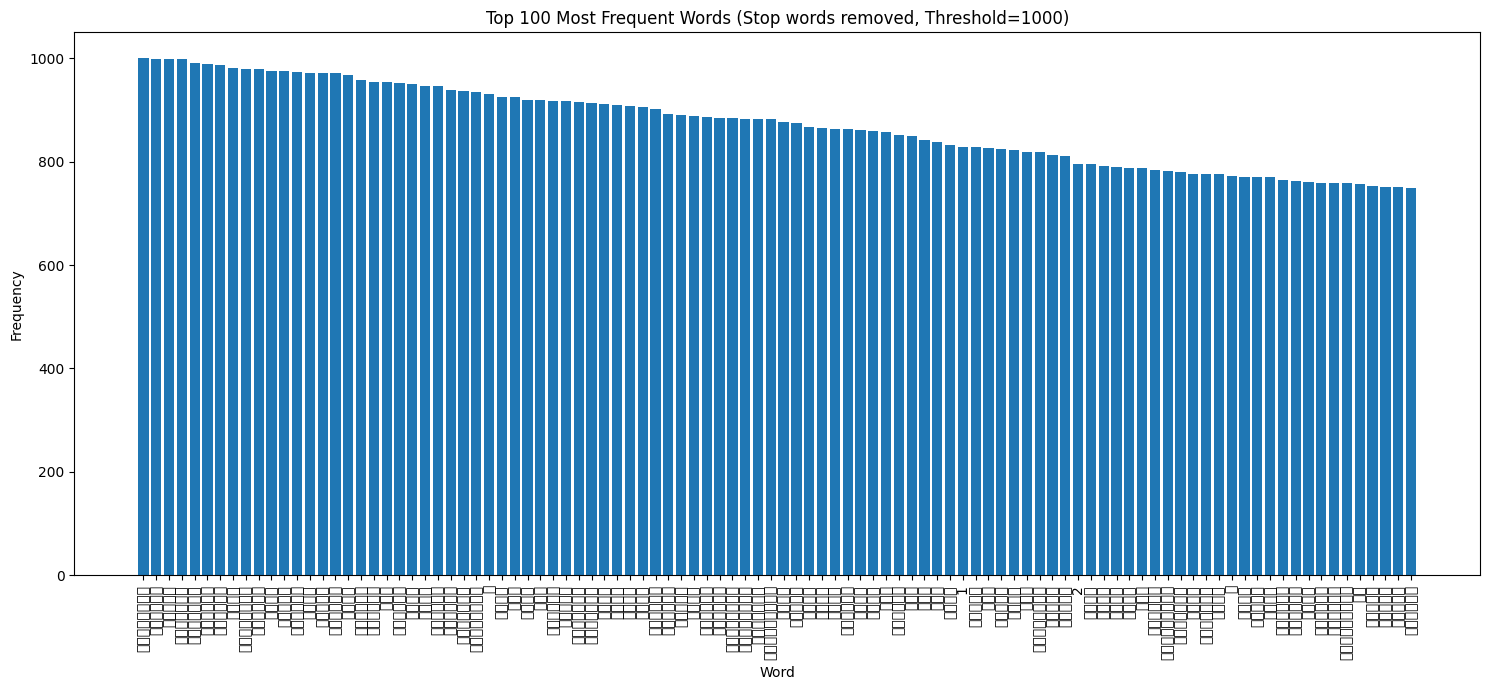

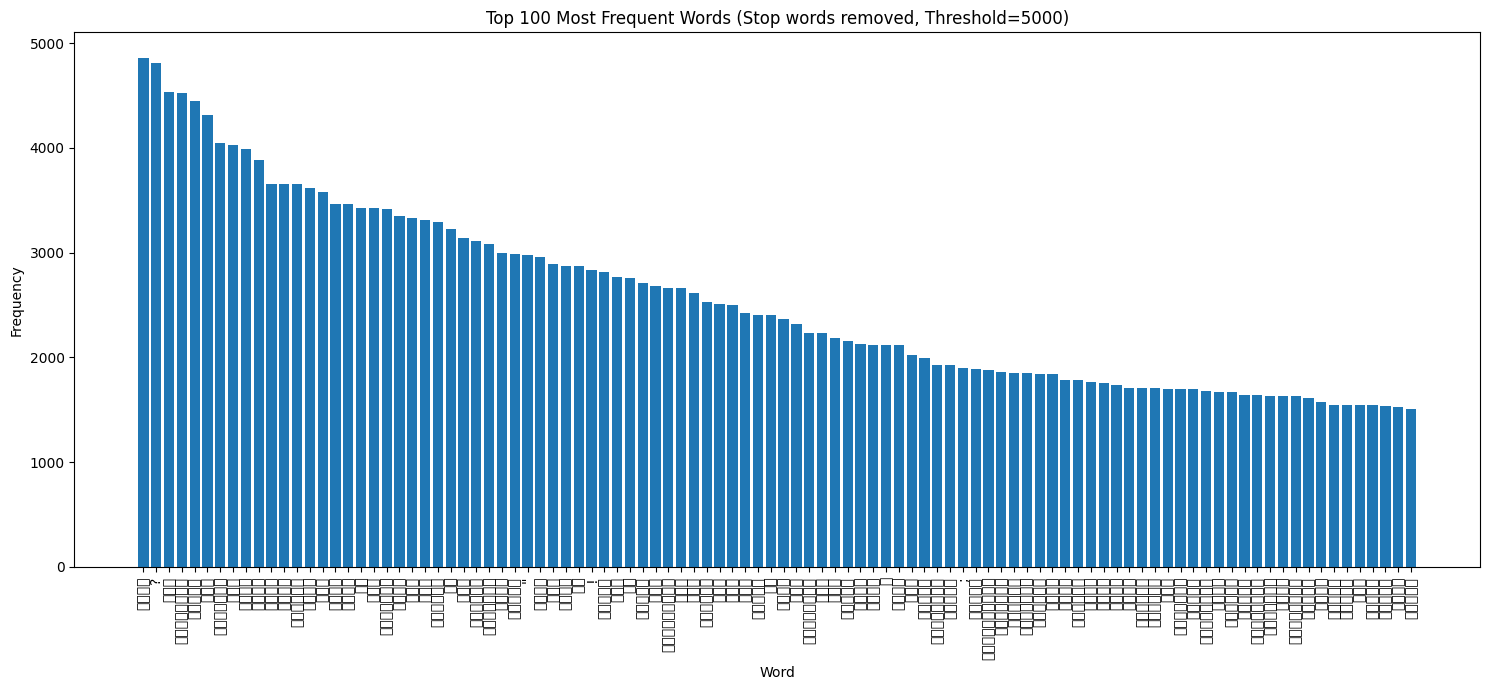

In [30]:
import matplotlib.pyplot as plt

# 1. Count word frequencies (no libraries, no collections)
freq = {}
for word in tokenized_dataset:
    if word in freq:
        freq[word] += 1
    else:
        freq[word] = 1

# 2. Plot top 100 most common words
top_100 = sorted(freq.items(), key=lambda x: x[1], reverse=True)[:100]
words_100 = [item[0] for item in top_100]
freqs_100 = [item[1] for item in top_100]

plt.figure(figsize=(15, 7))
plt.bar(words_100, freqs_100)
plt.xticks(rotation=90)
plt.xlabel("Word")
plt.ylabel("Frequency")
plt.title("Top 100 Most Frequent Words")
plt.tight_layout()
plt.show()

# 3. Identify stop words for three thresholds and replot
thresholds = [100, 1000, 5000]  # you can change these based on your dataset

for threshold in thresholds:
    stop_words = [word for word, count in freq.items() if count > threshold]
    filtered_freq = {word: count for word, count in freq.items() if word not in stop_words}
    top_100_filtered = sorted(filtered_freq.items(), key=lambda x: x[1], reverse=True)[:100]
    words_100_filtered = [item[0] for item in top_100_filtered]
    freqs_100_filtered = [item[1] for item in top_100_filtered]

    plt.figure(figsize=(15, 7))
    plt.bar(words_100_filtered, freqs_100_filtered)
    plt.xticks(rotation=90)
    plt.xlabel("Word")
    plt.ylabel("Frequency")
    plt.title(f"Top 100 Most Frequent Words (Stop words removed, Threshold={threshold})")
    plt.tight_layout()
    plt.show()